In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *
from read_bricks import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random

In [2]:
# modify NN function to return area covered by 500 kpc
# run k-d tree to find G2 stars within 500 kpc
# calculate gaia radius
# use gaia radius to calculate area A = pi*r**2
# (gaia area / search radius area) = proportion of 500 kpc area to eliminate

In [2]:
# read in STAR data

# np.savez('/Users/mtownsend/Documents/LRG_Data/ra_STARS-dr9.npz', ra_STAR=ra_STAR)
data_raSTAR = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/star-cats/ra_STAR-EDR-dr8.npz')
raSTAR = data_raSTAR['arr_0']
print(raSTAR.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/dec_STARS-dr9.npz', dec_STAR=dec_STAR)
data_decSTAR = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/star-cats/dec_STAR-EDR-dr8.npz')
decSTAR = data_decSTAR['arr_0']
print(decSTAR.shape)

print('----')

# # np.savez('/Users/mtownsend/Documents/LRG_Data/maskbits_STARS-dr9.npz', maskbits_STAR=maskbits_STAR)
# data_maskbitsSTAR = np.load('/Users/mtownsend/Documents/LRG_Data/maskbits_STARS-dr9.npz')
# maskbitsSTAR = data_maskbitsSTAR['maskbits_STAR']
# print(maskbitsSTAR.shape)

# print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/ref_cat_STARS-dr9.npz', ref_cat_STAR=ref_cat_STAR)
data_ref_catSTAR = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/star-cats/ref-cat_STAR-EDR-dr8.npz')
ref_catSTAR = data_ref_catSTAR['arr_0']
print(ref_catSTAR.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/gaia_phot_g_mean_mag_STARS-dr9.npz', gaia_phot_g_mean_mag_STAR=gaia_phot_g_mean_mag_STAR)
data_gaia_phot_gSTAR = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/star-cats/gaia-gmag_STAR-EDR-dr8.npz')
gaia_phot_g_mean_magSTAR = data_gaia_phot_gSTAR['arr_0']
print(gaia_phot_g_mean_magSTAR.shape)

print('----')


raG2 = raSTAR[np.where(ref_catSTAR == 'G2')]
decG2 = decSTAR[np.where(ref_catSTAR == 'G2')]
photgG2 = gaia_phot_g_mean_magSTAR[np.where(ref_catSTAR == 'G2')]

print(len(raG2))
print(len(decG2))
print(len(photgG2))


(8565577,)
----
(8565577,)
----
(8565577,)
----
(8565577,)
----
1058634
1058634
1058634


In [3]:
# read in galaxy data

# LRG data

# read LRG data arrays

data_raLRG = np.load('/Users/mtownsend/anaconda/Data/ra_LRG.npz')
raLRG = data_raLRG['ra_LRG']
print(raLRG.shape)

print('----')

data_decLRG = np.load('/Users/mtownsend/anaconda/Data/dec_LRG.npz')
decLRG = data_decLRG['dec_LRG']
print(decLRG.shape)

print('----')

data_zLRG = np.load('/Users/mtownsend/anaconda/Data/z_LRG.npz')
zLRG = data_zLRG['z_LRG']
print(zLRG.shape)

print('----')

data_gmagLRG = np.load('/Users/mtownsend/anaconda/Data/gmag_LRG.npz')
gmagLRG = data_gmagLRG['gmag_LRG']
print(gmagLRG.shape)

print('----')

data_rmagLRG = np.load('/Users/mtownsend/anaconda/Data/rmag_LRG.npz')
rmagLRG = data_rmagLRG['rmag_LRG']
print(rmagLRG.shape)

print('----')

data_zmagLRG = np.load('/Users/mtownsend/anaconda/Data/zmag_LRG.npz')
zmagLRG = data_zmagLRG['zmag_LRG']
print(zmagLRG.shape)
print(zmagLRG.min())
print(zmagLRG.max())

print('----')

data_grcolorLRG = np.load('/Users/mtownsend/anaconda/Data/grcolor_LRG.npz')
grcolorLRG = data_grcolorLRG['grcolor_LRG']
print(grcolorLRG.shape)

print('----')

data_rzcolorLRG = np.load('/Users/mtownsend/anaconda/Data/rzcolor_LRG.npz')
rzcolorLRG = data_rzcolorLRG['rzcolor_LRG']
print(rzcolorLRG.shape)



# BKG data

# read BKG data arrays

data_raBKG = np.load('/Users/mtownsend/anaconda/Data/ra_BKG_v2.npz')
raBKG = data_raBKG['ra_BKG']
print(raBKG.shape)

print('----')

data_decBKG = np.load('/Users/mtownsend/anaconda/Data/dec_BKG_v2.npz')
decBKG = data_decBKG['dec_BKG']
print(decBKG.shape)

print('----')

data_gmagBKG = np.load('/Users/mtownsend/anaconda/Data/gmag_BKG_v2.npz')
gmagBKG = data_gmagBKG['gmag_BKG']
print(gmagBKG.shape)

print('----')

data_rmagBKG = np.load('/Users/mtownsend/anaconda/Data/rmag_BKG_v2.npz')
rmagBKG = data_rmagBKG['rmag_BKG']
print(rmagBKG.shape)

print('----')

data_zmagBKG = np.load('/Users/mtownsend/anaconda/Data/zmag_BKG_v2.npz')
zmagBKG = data_zmagBKG['zmag_BKG']
print(zmagBKG.shape)

print('----')


data_grcolorBKG = np.load('/Users/mtownsend/anaconda/Data/grcolor_BKG_v2.npz')
grcolorBKG = data_grcolorBKG['grcolor_BKG']
print(grcolorBKG.shape)

print('----')

data_rzcolorBKG = np.load('/Users/mtownsend/anaconda/Data/rzcolor_BKG_v2.npz')
rzcolorBKG = data_rzcolorBKG['rzcolor_BKG']
print(rzcolorBKG.shape)


# combine LRG and BKG lists

ra = np.concatenate([raLRG, raBKG])
dec = np.concatenate([decLRG, decBKG])

gmag = np.concatenate([gmagLRG, gmagBKG])
rmag = np.concatenate([rmagLRG, rmagBKG])
zmag = np.concatenate([zmagLRG, zmagBKG])

grcolor = np.concatenate([grcolorLRG, grcolorBKG]) 
rzcolor = np.concatenate([rzcolorLRG, rzcolorBKG]) 




(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
15.818878
21.957382
----
(1823,)
----
(1823,)
(1294476,)
----
(1294476,)
----
(1294476,)
----
(1294476,)
----
(1294476,)
----
(1294476,)
----
(1294476,)


end cosmocalc

<class 'numpy.ndarray'>
end making 2D histogram



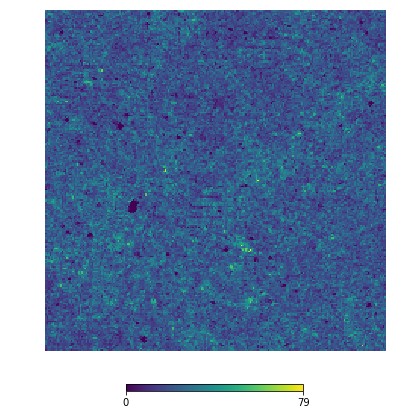

length phi:  1296299
end making HEALPix map


In [4]:
# start analysis that is necessary for NN to run

DTT_Gyr, age_Gyr, zage_Gyr, DCMR_Mpc, DCMR_Gyr, DA_Mpc, DA_Gyr, kpc_DA, DL_Mpc, DL_Gyr, V_Gpc = cosmoCalcfunc(zLRG)
print('end cosmocalc')
print()

rz_edges = np.array([-1.8027077, -1.5527076721191406, -1.3027076721191406, -1.0527076721191406, -0.8027076721191406, -0.5527076721191406, -0.3027076721191406, -0.052707672119140625, 0.19729232788085938, 0.4472923278808594, 0.6972923278808594, 0.9472923278808594, 1.1972923278808594, 1.4472923278808594, 1.6972923278808594, 1.9472923278808594, 2.1972923278808594, 2.4472923278808594, 2.6972923278808594, 2.9472923278808594, 3.1972923278808594, 3.4472923278808594, 3.6972923278808594, 3.9472923278808594, 4.197292327880859, 4.447292327880859, 4.697292327880859, 4.947292327880859, 5.197292327880859, 5.447292327880859, 5.697292327880859, 5.947292327880859, 6.197292327880859, 6.447292327880859, 6.697292327880859, 6.947292327880859, 7.197292327880859, 7.447292327880859, 7.697292327880859, 7.947292327880859, 8.19729232788086, 8.44729232788086, 8.69729232788086, 8.94729232788086, 9.19729232788086, 9.44729232788086, 9.69729232788086, 9.94729232788086, 10.19729232788086, 10.44729232788086])
# zmag_edges = np.array([13.22509, 14.025090026855466, 15.025090026855462, 16.02509002685546, 17.025090026855455, 18.02509002685545, 19.025090026855448, 20.025090026855445, 21.025, 22.025090026855437, 23.025090026855434])
gr_edges = np.array([-6.5846786, -6.234678649902344, -5.8846786499023445, -5.534678649902345, -5.184678649902345, -4.8346786499023455, -4.484678649902346, -4.134678649902346, -3.784678649902346, -3.434678649902346, -3.084678649902346, -2.734678649902346, -2.384678649902346, -2.0346786499023457, -1.6846786499023456, -1.3346786499023455, -0.9846786499023455, -0.6346786499023456, -0.2846786499023456, 0.06532135009765438, 0.41532135009765436, 0.7653213500976543, 1.1153213500976542, 1.4653213500976543, 1.8153213500976544, 2.1653213500976545, 2.5153213500976546, 2.8653213500976547, 3.2153213500976547, 3.565321350097655, 3.915321350097655, 4.265321350097655, 4.615321350097655, 4.965321350097654, 5.315321350097654, 5.665321350097654, 6.015321350097653, 6.365321350097653, 6.7153213500976525, 7.065321350097652, 7.415321350097652, 7.7653213500976515, 8.115321350097652, 8.465321350097652, 8.815321350097651, 9.165321350097651, 9.51532135009765, 9.86532135009765, 10.21532135009765, 10.56532135009765])

zmaginit = 13.
zmagfin = 23.
interval = 0.2
zmag_num = (zmagfin-zmaginit)/interval
zmag_edges, step = np.linspace(zmaginit, zmagfin, num=int(zmag_num), retstep=True)
print(type(zmag_edges))



# gr_edges = np.array([-6.58467865, -6.21463671, -5.84459476, -5.47455282, -5.10451087, -4.73446893,
#  -4.36442698, -3.99438504, -3.62434309, -3.25430115, -2.8842592,  -2.51421726,
#  -2.14417532, -1.77413337, -1.40409143, -1.03404948, -0.66400754, -0.29396559,
#   0.07607635,  0.4461183,  0.81616024,  1.18620219,  1.55624413,  1.92628607,
#   2.29632802,  2.66636996,  3.03641191,  3.40645385,  3.7764958,   4.14653774,
#   4.51657969,  4.88662163,  5.25666358,  5.62670552,  5.99674746,  6.36678941,
#   6.73683135,  7.1068733,   7.47691524,  7.84695719,  8.21699913,  8.58704108,
#   8.95708302,  9.32712497,  9.69716691, 10.06720885, 10.4372508,  10.80729274,
#  11.17733469, 11.54737663])

# rz_edges = np.array([-2.6097374,  -2.34501874, -2.08030008, -1.81558142, -1.55086276, -1.2861441,
#  -1.02142544, -0.75670678, -0.49198812, -0.22726946,  0.03744919,  0.30216785,
#   0.56688651,  0.83160517,  1.09632383,  1.36104249,  1.62576115,  1.89047981,
#   2.15519847,  2.41991713,  2.68463579,  2.94935444,  3.2140731,   3.47879176,
#   3.74351042,  4.00822908,  4.27294774,  4.5376664,   4.80238506,  5.06710372,
#   5.33182238,  5.59654103,  5.86125969,  6.12597835,  6.39069701,  6.65541567,
#   6.92013433,  7.18485299,  7.44957165,  7.71429031,  7.97900897,  8.24372763,
#   8.50844628,  8.77316494,  9.0378836,   9.30260226,  9.56732092,  9.83203958,
#  10.09675824, 10.3614769])

# zmaginit = 13.
# zmagfin = 23.
# interval = 0.2
# zmag_num = (zmagfin-zmaginit)/interval
# zmag_edges, step = np.linspace(zmaginit, zmagfin, num=int(zmag_num), retstep=True)

H1, nouse_edges = np.histogramdd((rzcolor, grcolor, zmag), bins=(rz_edges, gr_edges, zmag_edges), density=False)
print('end making 2D histogram')
print()


# Make HEALPix map using just RA/Dec; end up with a density plot

nside = 1024*2
npixel = hp.nside2npix(nside)

# Convert ra/dec into theta/phi
theta = []
phi = []

for i in range(len(ra)):
    theta.append(np.radians(90. - dec[i]))
    phi.append(np.radians(ra[i]))
    
m = hp.ang2pix(nside, theta, phi)
map_ = np.bincount(m, minlength=npixel)
hp.gnomview(map_, xsize=225, rot=(-116.5, 9), flip='geo', cmap='viridis', notext=True, title="")
# plt.rcParams.update({'font.size':20})
# plt.savefig('/Users/mtownsend/Desktop/survey-density.jpg')
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/HEALPix-survey-density-v2.pdf')
plt.show()

print('length phi: ', len(phi))

# Convert angles theta and phi to pixel numbers

pixnums = hp.ang2pix(nside, theta, phi, nest=True)
print('end making HEALPix map')



In [5]:
# def nearNeighbor(distance, kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, mag_LRG, mag_BKG, color1_LRG, color1_BKG, color2_LRG, color2_BKG, edges):
def nearNeighbor(distance, kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG):

    # distance == radius from LRG in which I look for near neighbors in Mpc

    import numpy as np
    from sklearn.neighbors import KDTree

    distance_kpc = distance * 10**3. # in kpc

    dist = []
    for i in range(len(kpc_DA)):
        dist.append((distance_kpc / kpc_DA[i]) * 1. / 3600.) # in degree
    
    area500 = []
    for i in range(len(dist)):
        area500.append(np.pi * dist[i]**2.)

     # Creates a list of ordered pairs; zips ra and dec together so they can be fed into KDTree
    zip_list0 = list(zip(ra_LRG, dec_LRG))  # LRG sources
    ra = np.concatenate([ra_LRG, ra_BKG])
    dec = np.concatenate([dec_LRG, dec_BKG])
    zip_list1 = list(zip(ra, dec))  # All sources


    # Creates a tree of EDR sources
    gal_tree = KDTree(zip_list1)

    # returns a list of EDR sources that are within some radius r of an LRG
    nn1 = gal_tree.query_radius(zip_list0, r=dist, count_only=True)
    # nn2 = gal_tree.query_radius(zip_list0, r=dist2, count_only=True)


    # find indices of near neighbors
    ind = gal_tree.query_radius(zip_list0, r=dist)

    ind2list = []
    ind2list = ind.tolist()

    index = []
    for i in range(len(ind2list)):
        index.append(ind2list[i].tolist())

    # # Array that gives actual number of near neighbors for every LRG
    # num = []
    #
    # for i in range(len(ind)):
    #     num.append(len(ind[i]))

    # index1 = []
    for i in range(len(index)):
        index[i] = [x for x in index[i] if x != i]

#     # Array that gives actual number of near neighbors for every LRG
#     num = []

#     for i in range(len(index)):
#         num.append(len(index[i]))

#     near = []
#     mag = np.concatenate([mag_LRG, mag_BKG])
#     color1 = np.concatenate([color1_LRG, color1_BKG])
#     color2 = np.concatenate([color2_LRG, color2_BKG])

#     # Creates one list of number of near neighbors for every LRG (number of lists = number of LRGs)
#     for i in range(len(index)):
#         if len(index[i]) == 0:
#             hist3d = np.zeros((len(edges[0]) - 1, len(edges[1]) - 1, len(edges[2] - 1)))
#             # hist2d = np.zeros((len(xedges) - 1, len(yedges) - 1))
#             near.append(hist3d)
#         else:

#             # hist2d, x_notuse, y_notuse = np.histogram2d(mag[index1[i]], color[index1[i]], bins=(xedges, yedges), normed=False)
#             # hist3d, edges_nouse = np.histogramdd((color1[index[i]], mag[index[i]], color2[index[i]]), bins=(edges[0], edges[1], edges[2]),
#             #                                             density=False)
#             hist3d, edges_nouse = np.histogramdd((color1[index[i]], color2[index[i]], mag[index[i]]), bins=(edges[0], edges[1], edges[2]),
#                                                  density=False)
#             near.append(hist3d)

    return (distance_kpc, dist, index, nn1, area500)
#     return (distance_kpc, near, gal_tree, dist, index, nn1, area500)
    # return (near, gal_tree)

In [6]:
distance = 0.5 # must be in Mpc

distance_kpc, dist, index, nn1, area500 = nearNeighbor(distance, kpc_DA, raLRG, decLRG, raG2, decG2)

print('end nearNeighbor')

end nearNeighbor


In [7]:
print(len(index))

1823


In [8]:
# ind = index[0:2]
# print(ind)

total_area = []
area = []
temp = []
for i in range(len(index)):
    for j in range(len(index[i])):
        gaia_radius = 150. * 2.5**((11. - photgG2[j])/3.) * (0.262/3600) # unit = degree
        area = np.pi * gaia_radius**2
        temp.append(area)
    total_area.append(np.sum(temp))
    temp = []
        


In [9]:
print(np.median(total_area))
# 7.417123832227717e-05

0.00022534407715858292


In [10]:
percentage = []
for i in range(len(total_area)):
    percentage.append((total_area[i]/area500[i]))
print(np.median(percentage))
print(len(percentage))

percent_kept = 1.0 - np.array(percentage)
print(len(percent_kept))
print(np.median(percent_kept))

# 0.04780880703986491
# 2100
# 2100
# 0.9521911929601351

0.08481358724714677
1823
1823
0.9151864127528533


In [11]:
np.savez('/Users/mtownsend/Documents/LRG_Data/percent_kept_a500-EDR.npz', percent_kept=percent_kept)
data_percent_kept = np.load('/Users/mtownsend/Documents/LRG_Data/percent_kept_a500-EDR.npz')
percentKept = data_percent_kept['percent_kept']
print(len(percentKept))
print(np.median(percentKept))

1823
0.9151864127528533
